# ThetaScan

## 0. Set-up

In [13]:
import sys
import os
import numpy as np

In [2]:
sys.path.append(os.path.abspath("../package"))


In [3]:
import ThetaScan
from ThetaScan.utilities import *
from ThetaScan.ThetaScan import *

In [4]:
import seaborn as sns
sns.set_theme(style="whitegrid")

## 1. Generate synthetic data

In [7]:
N = 3 #number of traces to generate
ts_len = 500 #length of the traces
ts_types=["stationary", "trending", "periodic"]
data, names = generate_ts_dataset(N, ts_len, ts_types)

Generating stationary trace centered at 241...
Generating trending trace with slope 0.66 and intercept 726...
Generating periodic trace with period 32


In [8]:
examples = {}
for ts_type in ts_types:
    examples[ts_type] = data[random.choice([i for i, e in enumerate(names) if e == ts_type])]


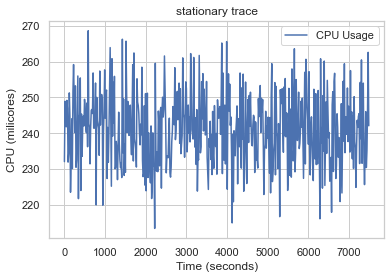

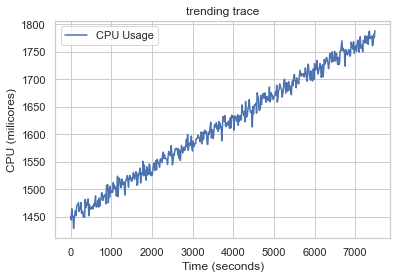

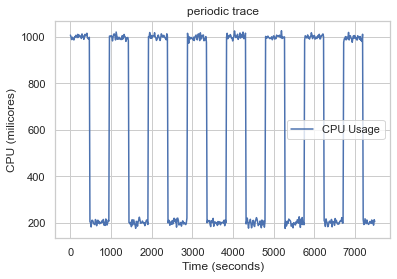

In [9]:
for key in examples:
    plot_trace(examples[key], key + " trace", "CPU (milicores)", trace_legend="CPU Usage")

## 2. Recommend limits

In [24]:
def plot_recommendations(trace, forecast, request, plt_name="trace", y_label="CPU (milicores)", trace_legend="CPU Usage"):
    trace_len = len(trace)
    trace_idx = np.arange(trace_len) * 15 #set index 0,15,30,45,...,7470,7485
    trace_pd = pd.DataFrame({trace_legend: trace,"ThetaScan forecasted request": request, "ThetaScan forecasted predicted": forecast}, index=trace_idx)
    ax = trace_pd.plot()
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel(y_label)
    ax.set_title(plt_name)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #if plt_name == "trending trace": ax.legend(loc='lower right')
    #else: ax.legend(loc='upper right')
    fig = plt.gcf()
    fig.set_size_inches(10, 4)
    plt.show()

### 2.1 Fixed window 5 minutes

In [25]:
TS = ThetaScan()

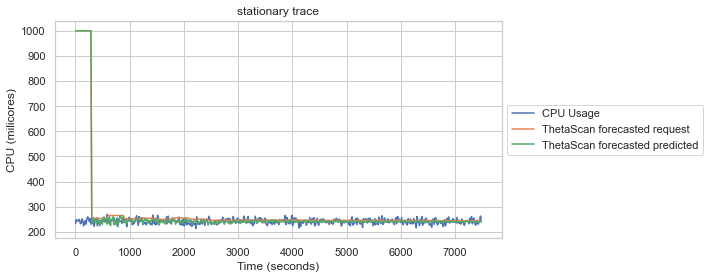

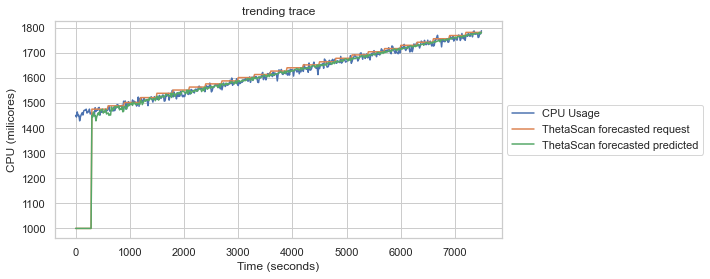

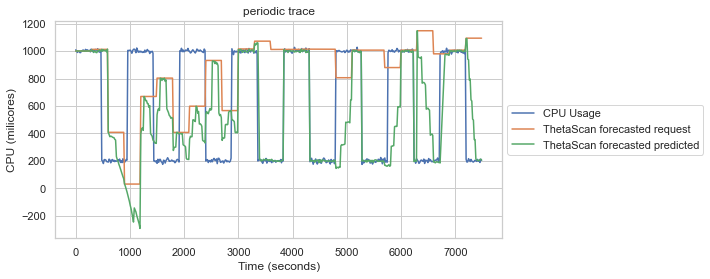

In [26]:
for i, trace in enumerate(data):
    forecasted_request, forecasted_predicted = TS.recommend(trace)
    plot_recommendations(trace, forecasted_predicted, forecasted_request, names[i] + " trace")


### 2.1 Dynamic window

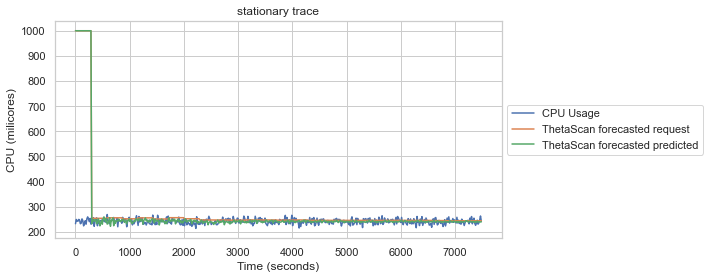

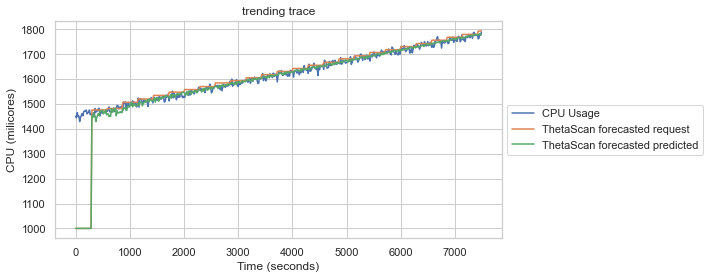

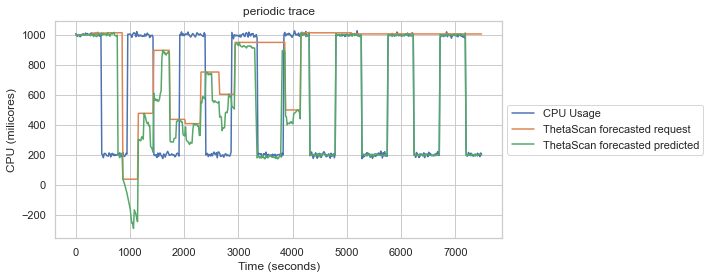

In [27]:
for i, trace in enumerate(data):
    forecasted_request, forecasted_predicted = TS.dynamic_recommend(trace)
    plot_recommendations(trace, forecasted_predicted, forecasted_request, names[i] + " trace")

